# **Home Credit Score Card Model** #
### **Home Credit Indonesia Data Scientist Virtual Internship Program** ###
### **By : Trianto Haryo Nugroho** ###

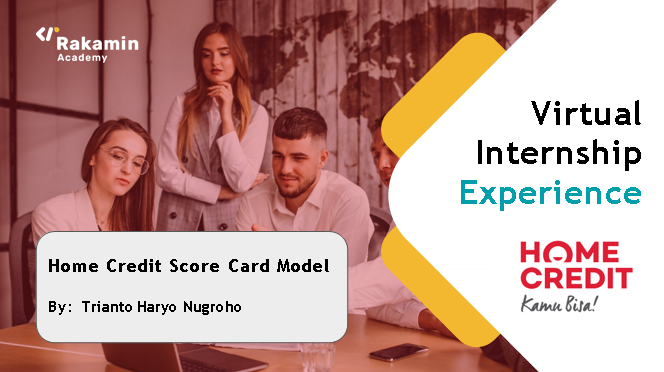

### **Data Understanding**


#### **Home Credit Score Card Model**
Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, saya membuka potensi maksimal dari data yang tersedia untuk mencari model terbaik dari 10 model klasifikasi machine learning untuk memprediksi apakah pinjaman di approve atau tidak. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman tetap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses. 


### **Exploratory Data Analysis (EDA)**

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

**Read Dataset**

In [2]:
df = pd.read_csv('application_train.csv')

**Display 5 Samples**

In [3]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Dataset Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The dataset consists of 307.511 rows and 122 columns

**Checking Missing Values**

In [5]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

There are many missing value in the dataset


**Drop Missing Values**

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

**Drop the column that contains all zero values**

In [8]:
df = df.loc[:, (df != 0).any(axis=0)]

In [9]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


**Creating Age Column**


In [10]:
df['Age'] = (df['DAYS_REGISTRATION']-df['DAYS_BIRTH'])/365

In [11]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,36.164384
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,31.813699
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,5.805479
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,40.454795


**Checking Data Duplicates**

In [12]:
df[df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age


There is no duplicate data in the dataset

**Checking Shape or Dimension**

In [13]:
df.shape

(8602, 121)

**Checking Label Proportion**

In [14]:
df.TARGET.value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

In [15]:
print(df.TARGET.value_counts(normalize=True)*100)
print('\n')

0    93.885143
1     6.114857
Name: TARGET, dtype: float64




<AxesSubplot:>

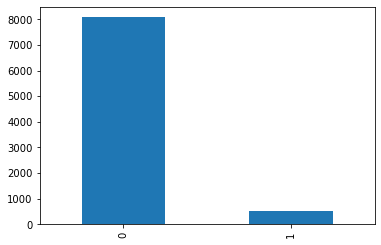

In [16]:
df.TARGET.value_counts().plot(kind='bar')

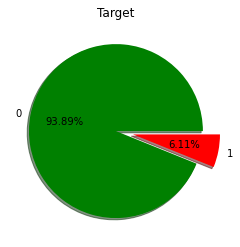

In [17]:
import matplotlib.pyplot as plt

label = ('0', '1')
color = ('green','red')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Significant differences in the proportion of labels in the classification case can cause computers/machines to not learn well so that the model formed can only recognize dominant labels.

There is significant difference in the proportion of labels in this dataset

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


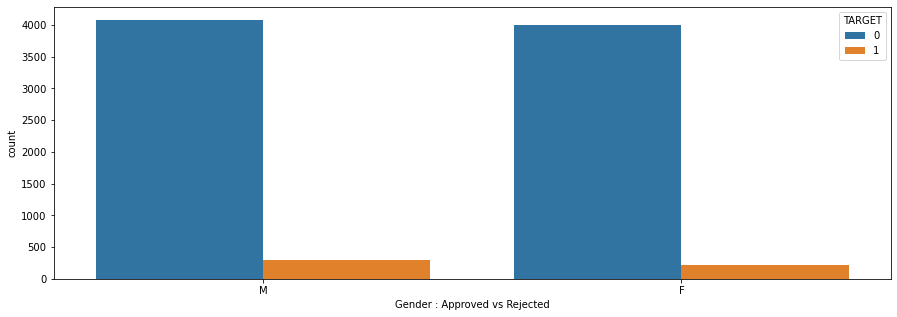

In [18]:
plt.figure(figsize = (15,5))
sns.countplot('CODE_GENDER',hue='TARGET',data=df)
plt.xlabel('Gender : Approved vs Rejected')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


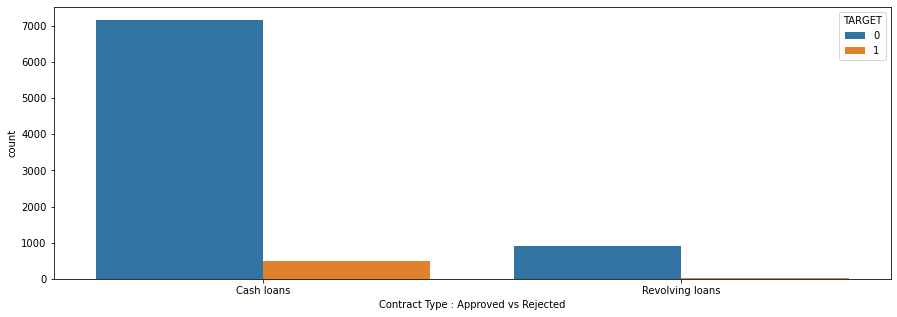

In [19]:
plt.figure(figsize = (15,5))
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=df)
plt.xlabel('Contract Type : Approved vs Rejected')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

**Descriptive Statistic**

In [20]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615,27.156247
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799,10.735487
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.560274
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.465753
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,34.404795
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000,64.200000


**Histogram**

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

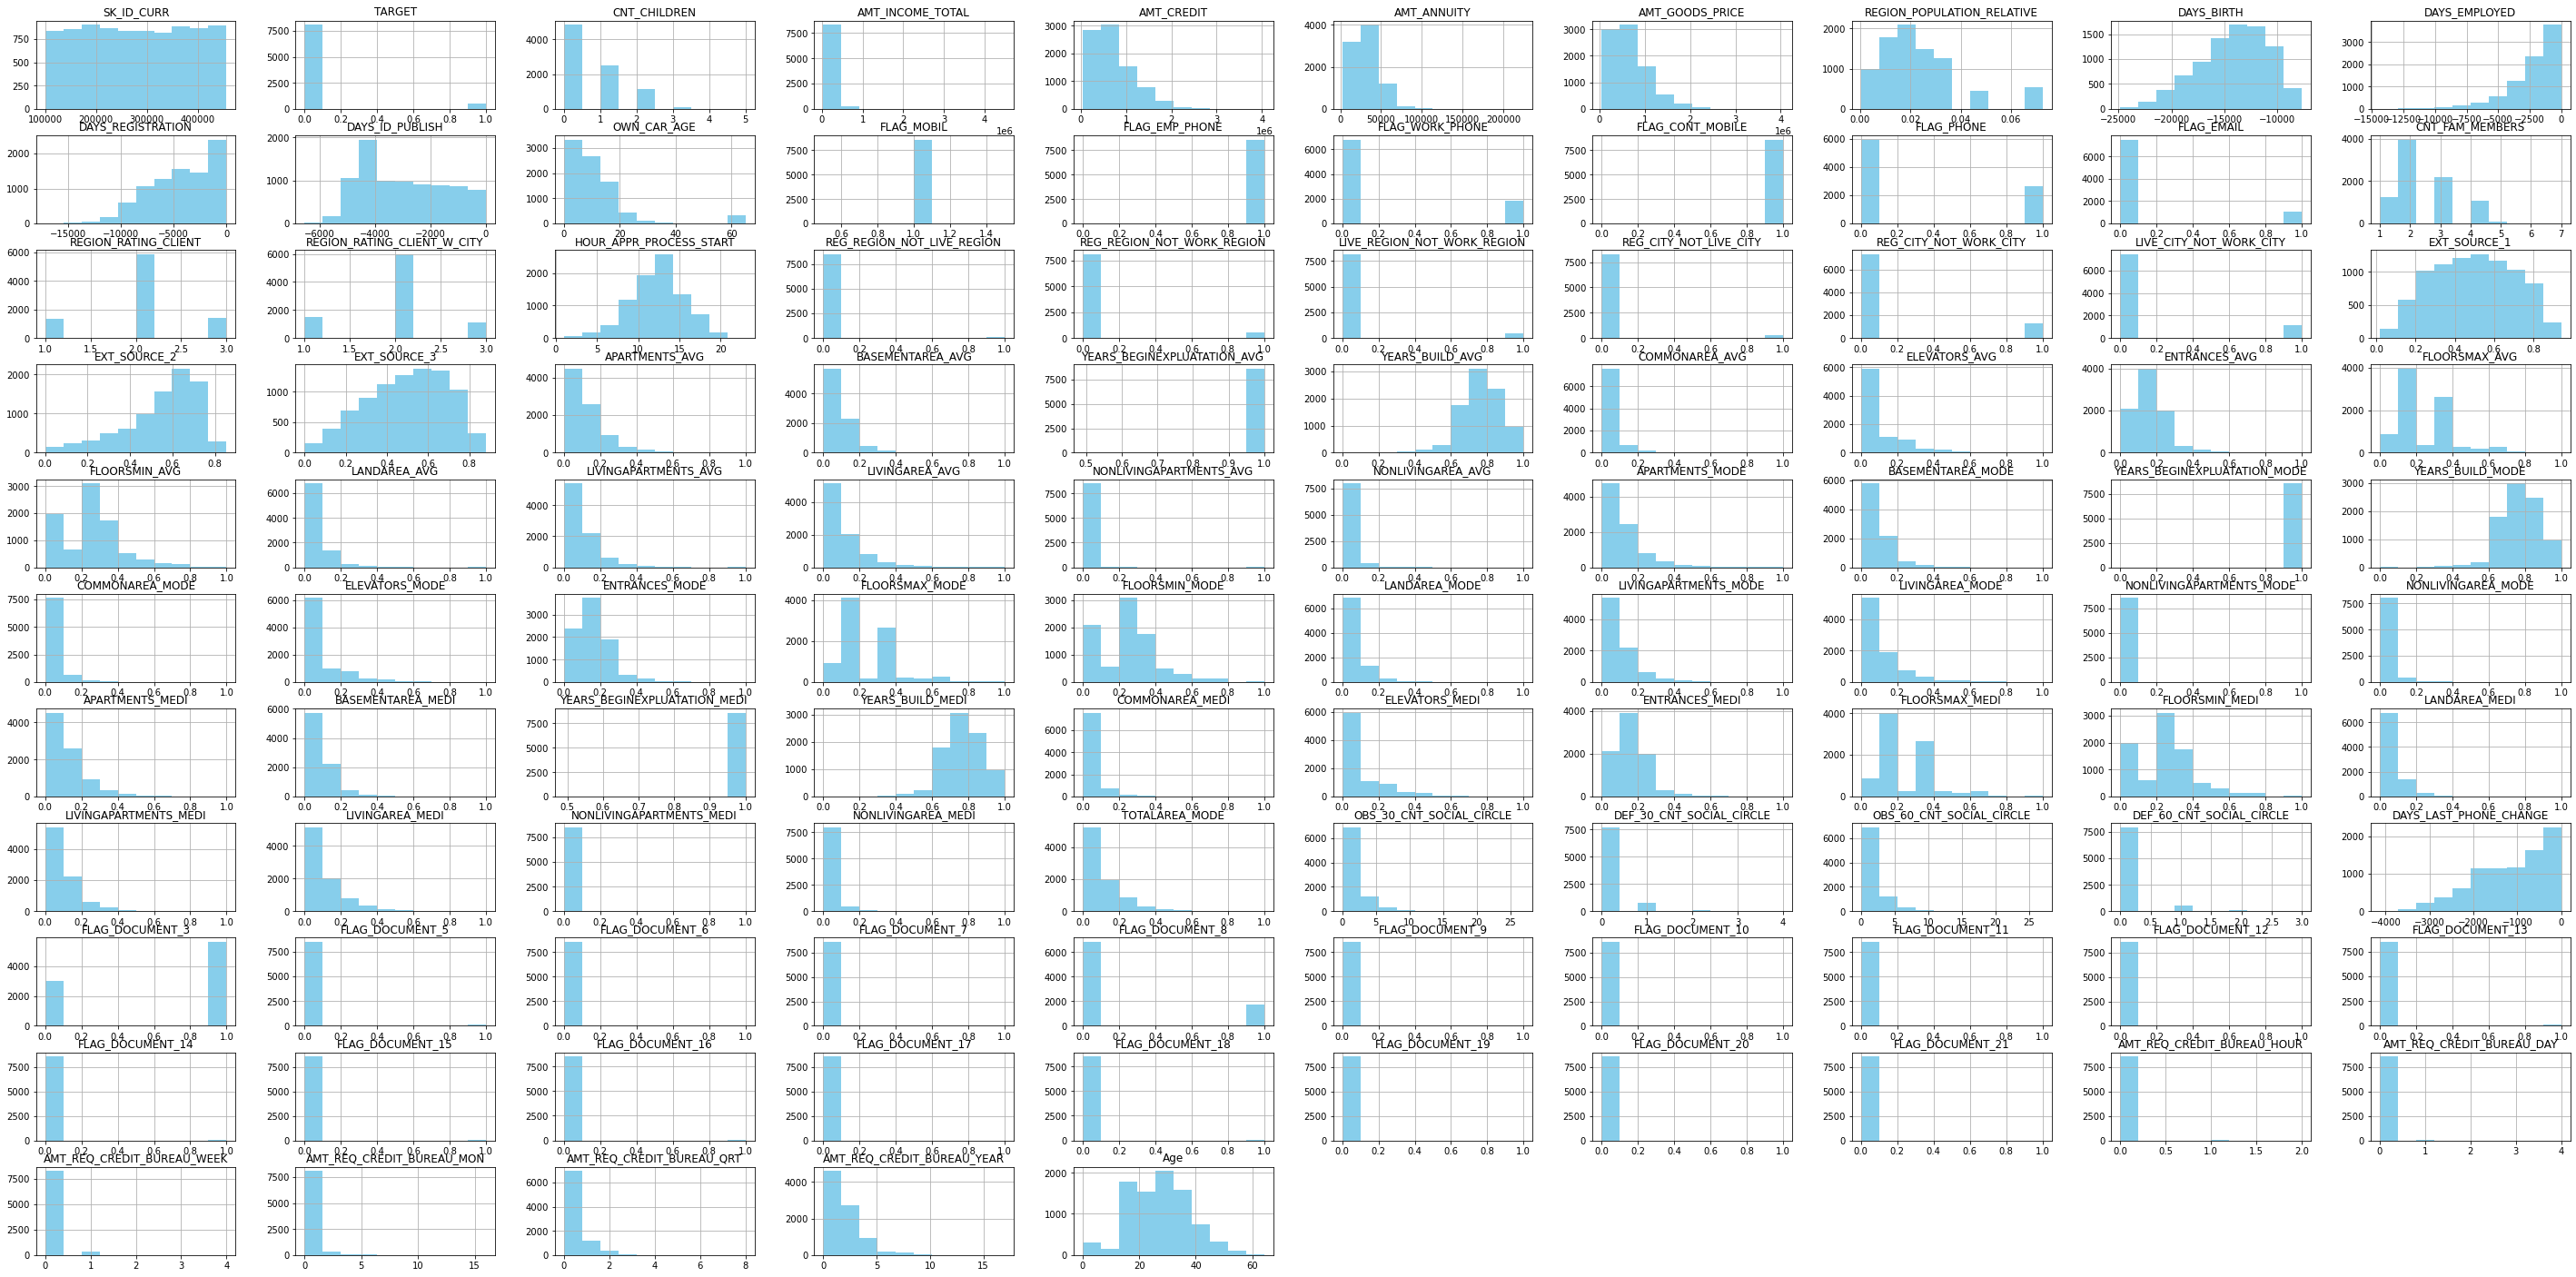

In [21]:
df.hist(figsize=(50,25),color='skyblue')

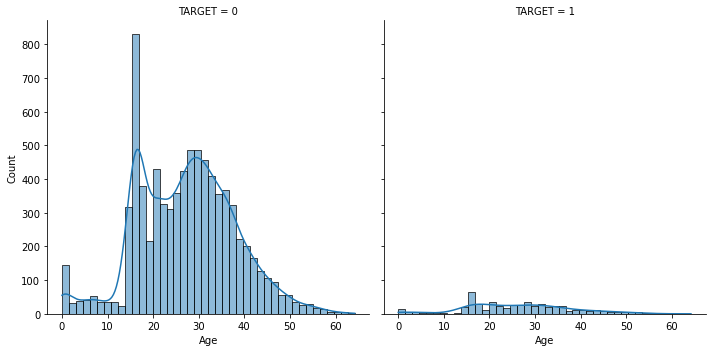

In [22]:
sns.displot(data=df, x="Age", col='TARGET', kde=True)
plt.show()

**Pair Plot**

In [23]:
# sns.pairplot(data=df,hue="TARGET",size=3);
# plt.show()

#### **Correlation**

In [24]:
# heatmap

# plt.figure(figsize = (100, 60))

# corr = df.corr()

# sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

In [25]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
                                 ...   
FLOORSMAX_AVG                 -0.046110
EXT_SOURCE_1                  -0.129548
EXT_SOURCE_2                  -0.130969
EXT_SOURCE_3                  -0.150720
FLAG_MOBIL                          NaN
Name: TARGET, Length: 105, dtype: float64

#### **Checking for Multicolinearity**

In [26]:
# checking for multicollinearity

# plt.figure(figsize = (100, 60))

# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype = bool))

# sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

From the above plot, we can see that there is no high correlation between colums

#### **Checking Number of Unique Values** 

In [27]:
df.nunique()

SK_ID_CURR                    8602
TARGET                           2
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     1
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK       5
AMT_REQ_CREDIT_BUREAU_MON       17
AMT_REQ_CREDIT_BUREAU_QRT        8
AMT_REQ_CREDIT_BUREAU_YEAR      13
Age                           6069
Length: 121, dtype: int64

In [28]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521


#### **Remove Unnecessary Columns**

In [29]:
# dropping columns which are not necessary for prediction

to_drop = ['SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START']

df.drop(to_drop, inplace = True, axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 114 entries, TARGET to Age
dtypes: float64(65), int64(34), object(15)
memory usage: 7.8+ MB


### **Data Preprocessing**

#### **Separating the feature and target columns**




In [31]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

### **Encoding Categorical Columns**

*Seeing* the percentage distribution of categorical data, if there is one value that dominates the feature, it will be discarded

In [32]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         89.049058
Revolving loans    10.950942
Name: NAME_CONTRACT_TYPE, dtype: float64


M    50.930016
F    49.069984
Name: CODE_GENDER, dtype: float64


Y    100.0
Name: FLAG_OWN_CAR, dtype: float64


Y    68.774704
N    31.225296
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      83.399209
Family             11.415950
Spouse, partner     3.673564
Children            0.732388
Other_B             0.465008
Other_A             0.220879
Group of people     0.093002
Name: NAME_TYPE_SUITE, dtype: float64


Working                 58.707277
Commercial associate    32.969077
State servant            8.323646
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    54.010695
Higher education                 40.955592
Incomplete higher                 4.557080
Lower secondary                   0.406882
Academic degree                   0.069751
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 71.367124
Single / not married    13.473611
Ci

#### **Extracting Categorical Columns**

In [33]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [34]:
cat_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
71,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
124,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,Laborers,Self-employed,reg oper spec account,block of flats,Panel,No
152,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,Trade: type 7,reg oper account,block of flats,Monolithic,No
161,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,Government,reg oper account,block of flats,Panel,No
255,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,Panel,No


#### **Printing Unique Values of Each Columns**

In [35]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

NAME_CONTRACT_TYPE: 
['Cash loans' 'Revolving loans']

CODE_GENDER: 
['M' 'F']

FLAG_OWN_CAR: 
['Y']

FLAG_OWN_REALTY: 
['Y' 'N']

NAME_TYPE_SUITE: 
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

NAME_INCOME_TYPE: 
['Working' 'Commercial associate' 'State servant']

NAME_EDUCATION_TYPE: 
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS: 
['Married' 'Separated' 'Single / not married' 'Widow' 'Civil marriage']

NAME_HOUSING_TYPE: 
['House / apartment' 'With parents' 'Municipal apartment'
 'Office apartment' 'Co-op apartment' 'Rented apartment']

OCCUPATION_TYPE: 
['Laborers' 'Managers' 'Drivers' 'Core staff' 'Sales staff'
 'High skill tech staff' 'Medicine staff' 'Accountants'
 'Private service staff' 'Cooking staff' 'HR staff' 'Cleaning staff'
 'Security staff' 'Secretaries' 'IT staff' 'Realty agents'
 'Waiters/barmen staff' 'Low-skill Laborers']

ORGANIZATIO

#### **Get Dummies from Categorical Columns**

In [36]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [37]:
cat_df.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_State servant,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
124,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
152,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
255,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### **Extracting the Numerical Columns**

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 113 entries, NAME_CONTRACT_TYPE to Age
dtypes: float64(65), int64(33), object(15)
memory usage: 7.7+ MB


In [39]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64','float64'])

In [40]:
num_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,41.273973
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42.520548
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,30.671233
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,37.008219
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,30.194521


#### **Combining Numerical and Categorical Columns**

In [41]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [42]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
71,0,103500.0,573628.5,24435.0,463500.0,0.009657,22.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
124,1,202500.0,260725.5,16789.5,198000.0,0.018850,8.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,202500.0,675000.0,53329.5,675000.0,0.031329,4.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
161,0,162000.0,263686.5,24781.5,238500.0,0.022625,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
255,1,225000.0,1019205.0,31032.0,774000.0,0.072508,9.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

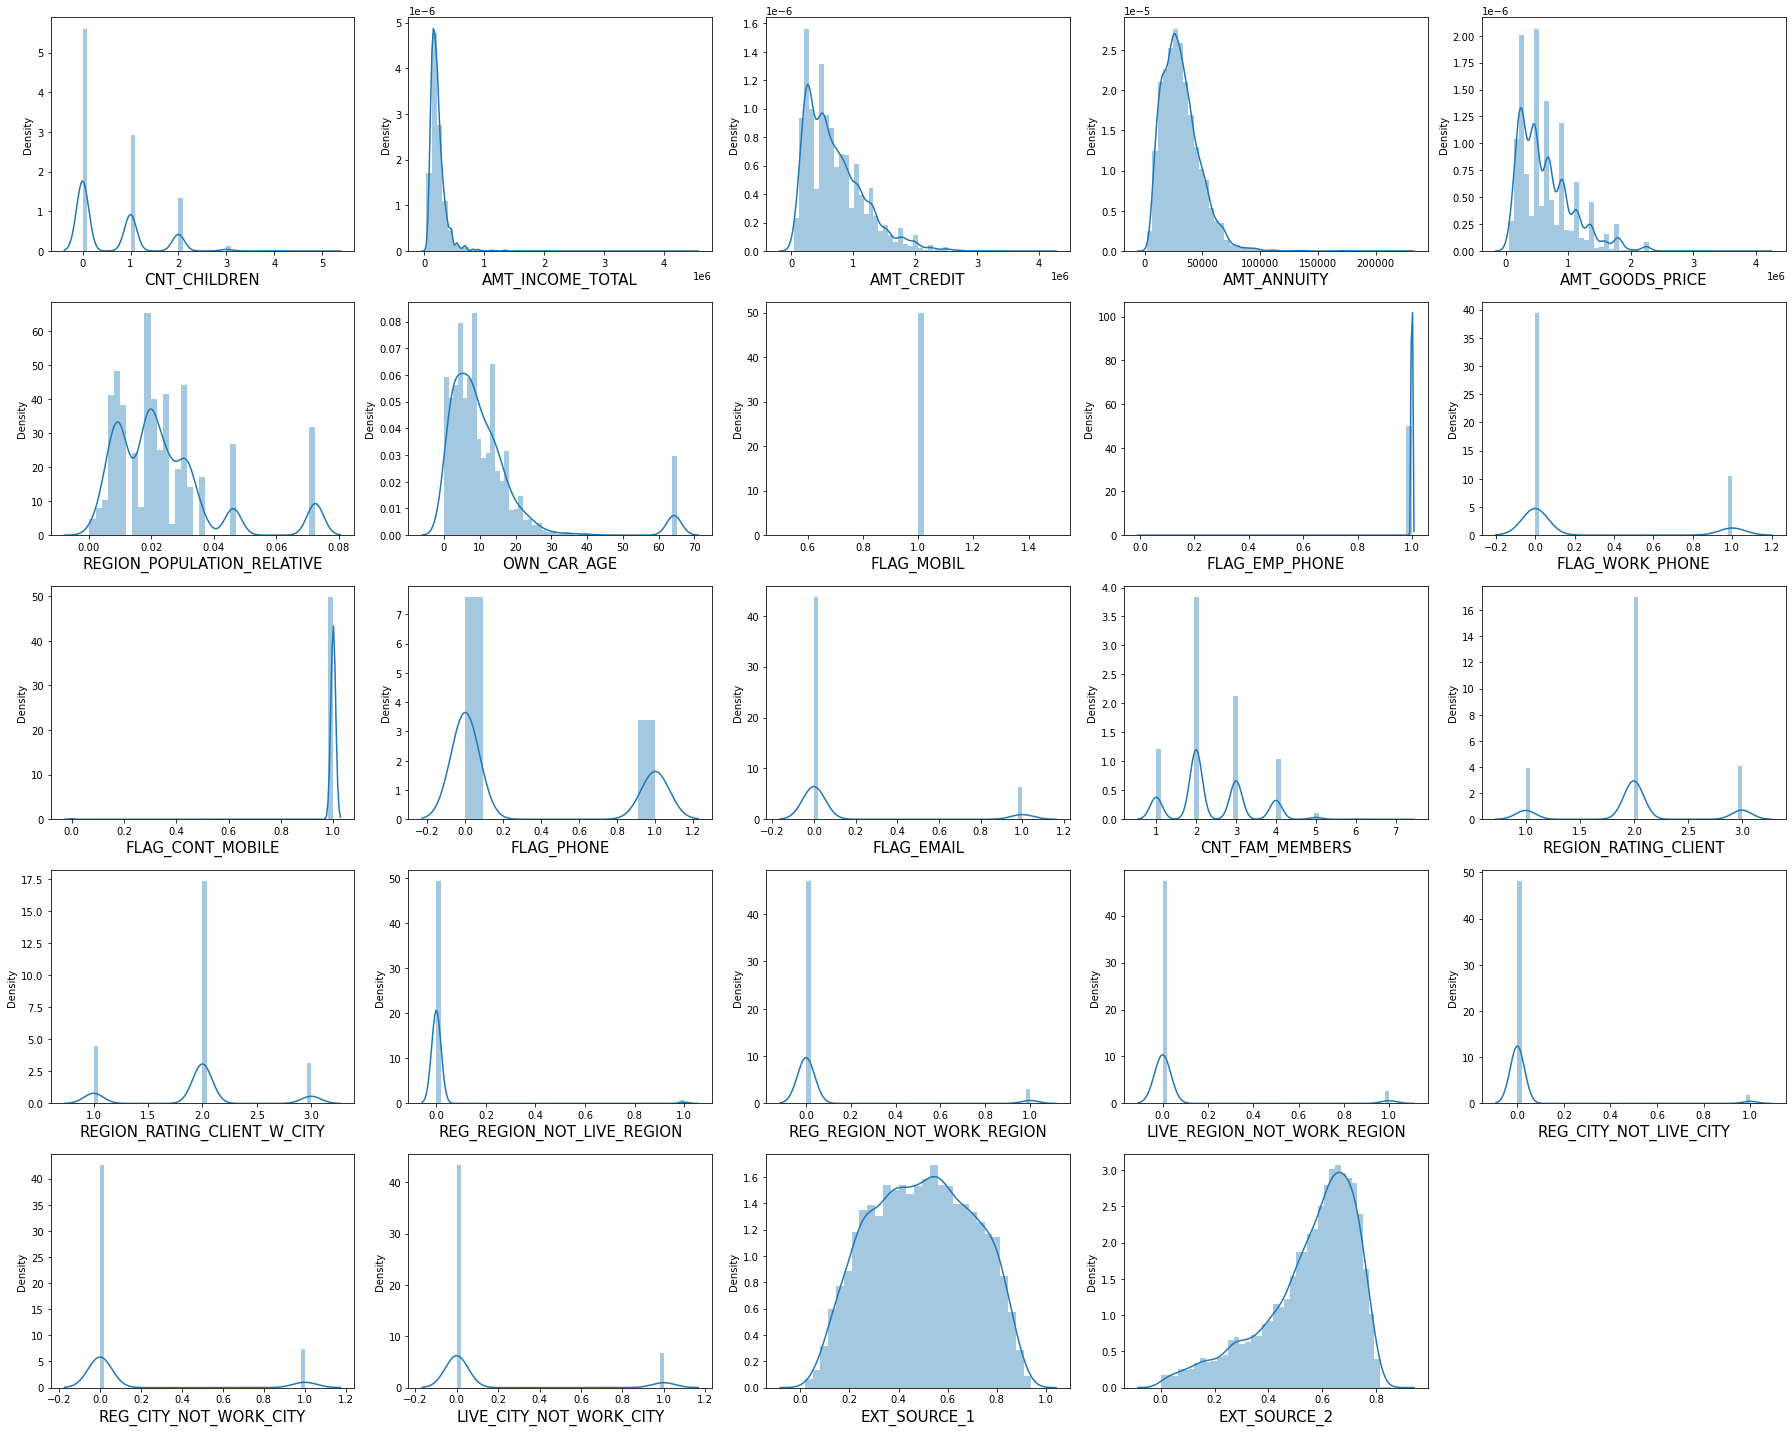

In [43]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good, let's check for outliers.




### **Outliers Detection**

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

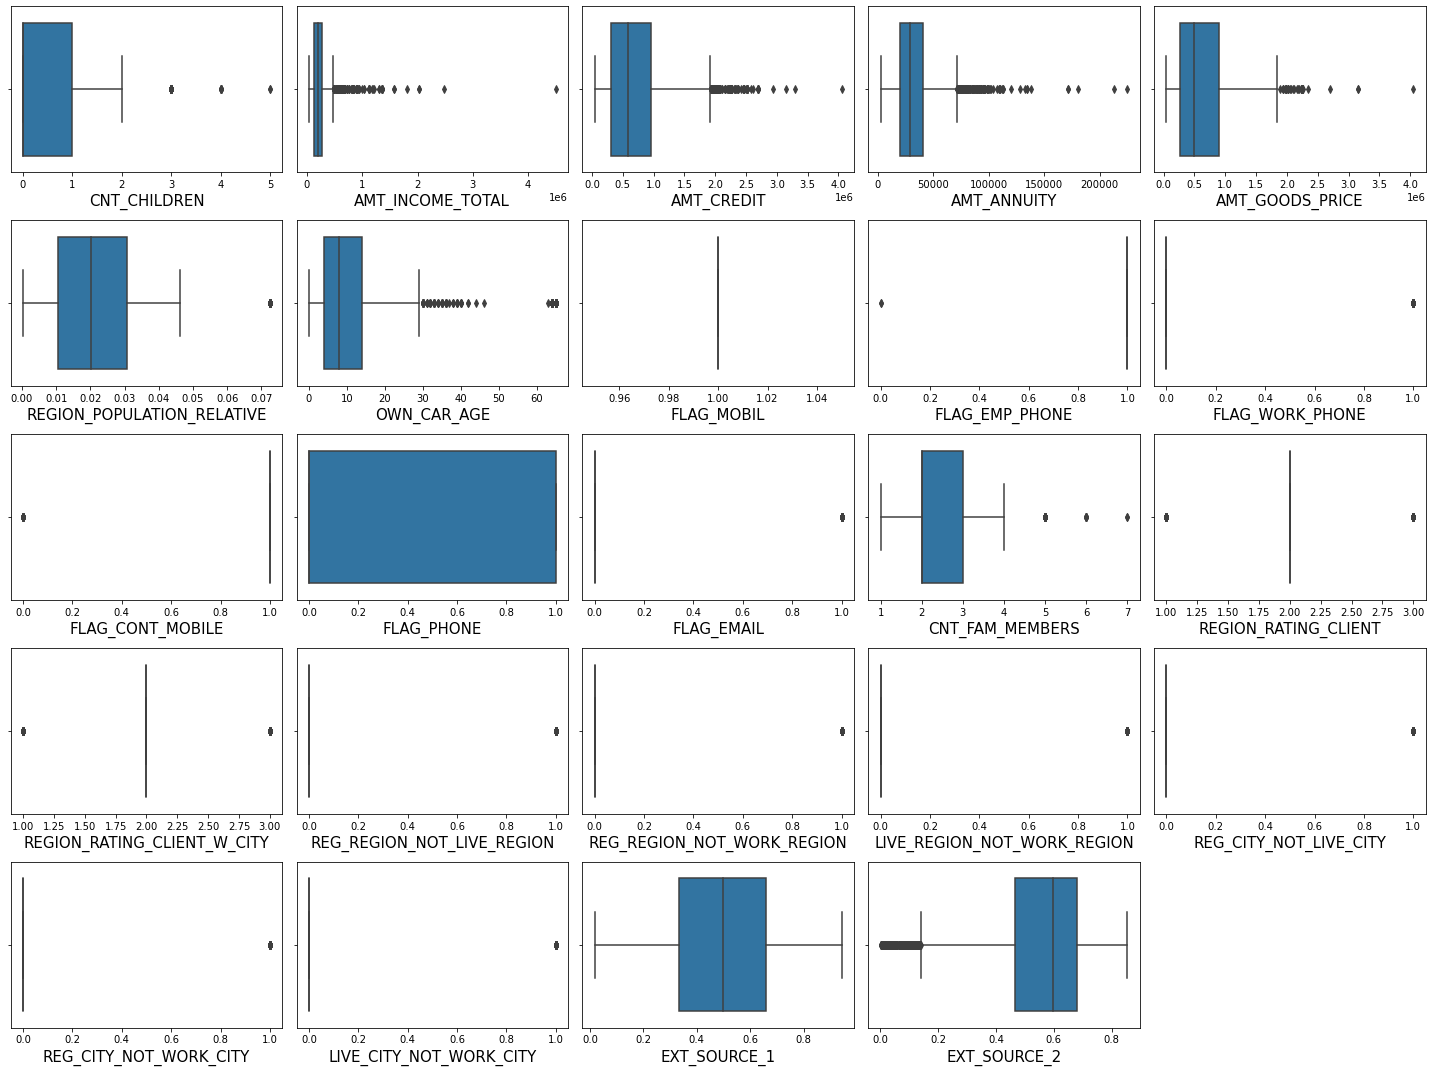

In [44]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later



In [45]:
X.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       ...
       'FONDKAPREMONT_MODE_reg oper spec account',
       'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=205)

**Handling Outliers**

In [46]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'REGION_POPULATION_RELATIVE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_2']
for i in X[outlier_list]:
    X[i]=treat_outlier(X[i])

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

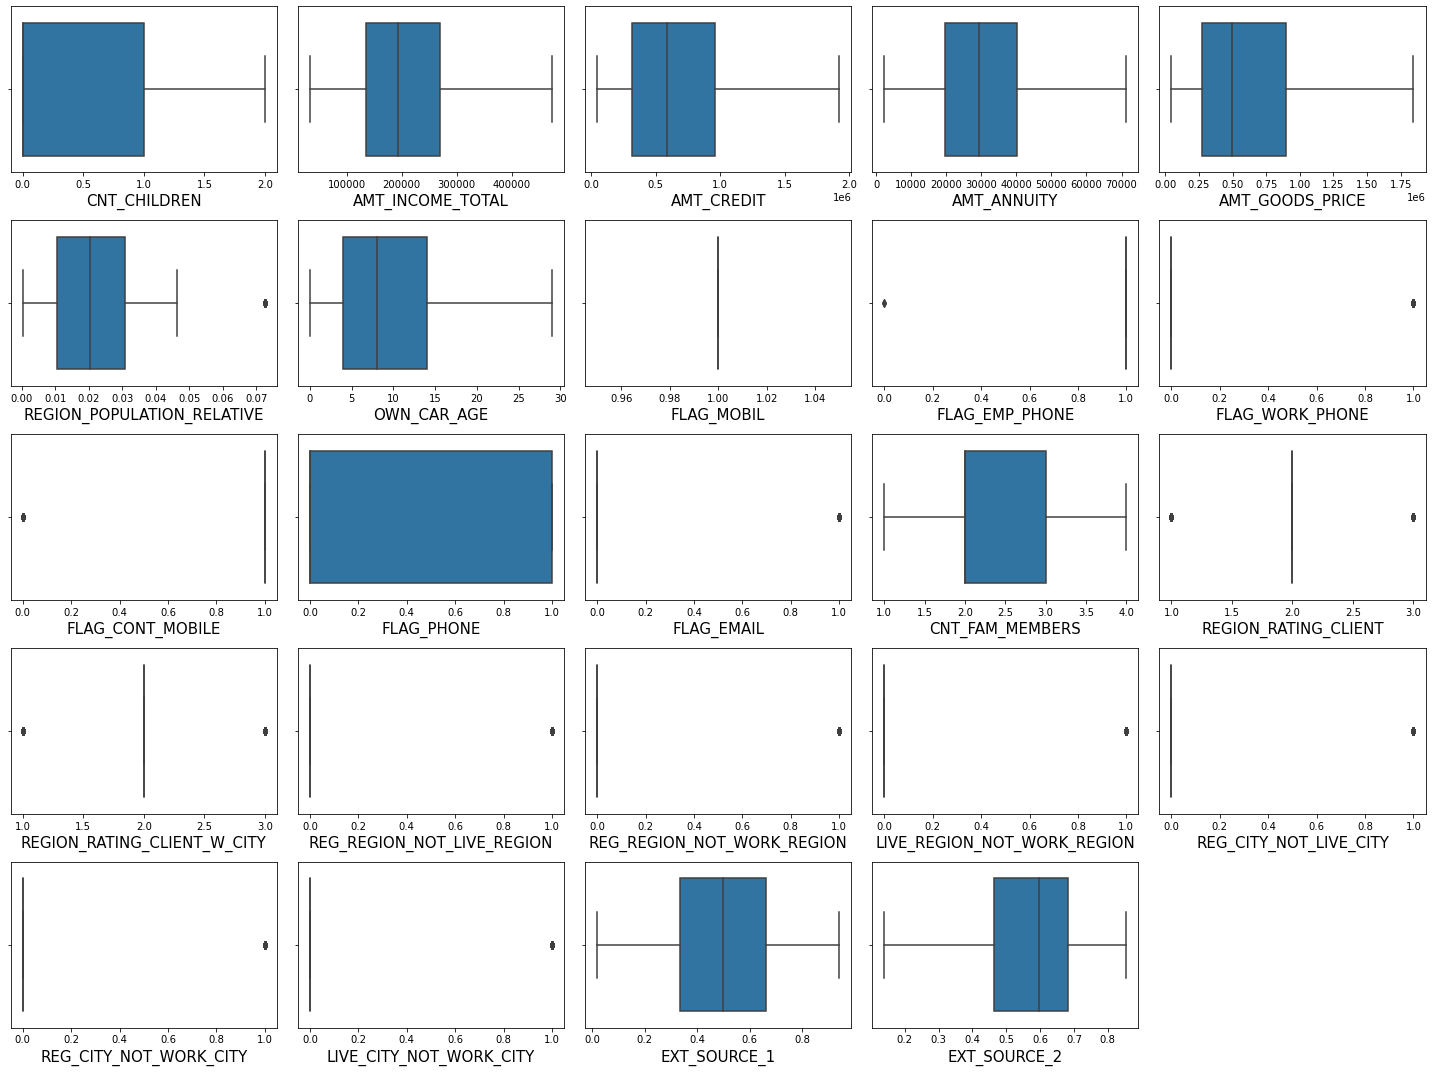

In [47]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

### **Split Dataset**

In [48]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
93065,0.0,450000.0,1350000.0,67500.0,1350000.0,0.011657,0.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
87507,2.0,157500.0,835380.0,35523.0,675000.0,0.020246,15.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
65903,2.0,225000.0,1762110.0,51651.0,1575000.0,0.020246,5.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
166777,2.0,135000.0,1131790.5,44176.5,859500.0,0.020713,13.0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
273950,1.0,67500.0,202500.0,10125.0,202500.0,0.020713,21.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307215,0.0,157500.0,225000.0,15034.5,225000.0,0.018634,9.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5911,0.0,315000.0,1096020.0,59589.0,900000.0,0.046220,1.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
183199,2.0,103500.0,314055.0,16164.0,238500.0,0.022800,7.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
203380,0.0,135000.0,667237.5,32229.0,576000.0,0.031329,20.0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [50]:
y_train

93065     0
87507     0
65903     1
166777    0
273950    0
         ..
307215    0
5911      0
183199    0
203380    1
160745    0
Name: TARGET, Length: 6881, dtype: int64

In [51]:
X_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
24160,2.0,180000.0,540000.0,27000.0,540000.0,0.010006,7.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
224037,0.0,135000.0,225000.0,21253.5,225000.0,0.046220,4.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
260235,1.0,126000.0,634482.0,20596.5,454500.0,0.010966,7.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
73530,0.0,225000.0,946764.0,37174.5,765000.0,0.018801,3.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
199112,0.0,126000.0,314100.0,11767.5,225000.0,0.030755,8.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212590,2.0,157500.0,180000.0,10462.5,180000.0,0.015221,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
231576,2.0,157500.0,180000.0,9000.0,180000.0,0.019689,13.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
220480,1.0,180000.0,675000.0,26541.0,675000.0,0.046220,10.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
304883,2.0,270000.0,1126548.0,29718.0,983713.5,0.018634,2.0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [52]:
y_test

24160     0
224037    0
260235    0
73530     0
199112    0
         ..
212590    0
231576    0
220480    0
304883    0
229558    0
Name: TARGET, Length: 1721, dtype: int64

#### **Normalization**

In [53]:
num_df = X_train.select_dtypes(include = ['int64','float64'])

In [54]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)

In [55]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
93065,0.0,0.948718,0.695334,0.943054,0.7250,0.145735,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.5625,0.268980
87507,1.0,0.282051,0.421132,0.472520,0.3500,0.266313,0.517241,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.3750,0.353689
65903,1.0,0.435897,0.914915,0.709840,0.8500,0.266313,0.172414,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.1875,0.465711
166777,1.0,0.230769,0.579067,0.599854,0.4525,0.272869,0.448276,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.4375,0.268681
273950,0.5,0.076923,0.083920,0.098795,0.0875,0.272869,0.724138,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.1250,0.375411


In [56]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [57]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [58]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
93065,0.0,0.948718,0.695334,0.943054,0.7250,0.145735,0.000000,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
87507,1.0,0.282051,0.421132,0.472520,0.3500,0.266313,0.517241,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
65903,1.0,0.435897,0.914915,0.709840,0.8500,0.266313,0.172414,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
166777,1.0,0.230769,0.579067,0.599854,0.4525,0.272869,0.448276,0.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,0
273950,0.5,0.076923,0.083920,0.098795,0.0875,0.272869,0.724138,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


#### **Balancing the Dataset using oversampling (SMOTE)** 

In [59]:
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  TARGET
0       0    6451
1       1    6451


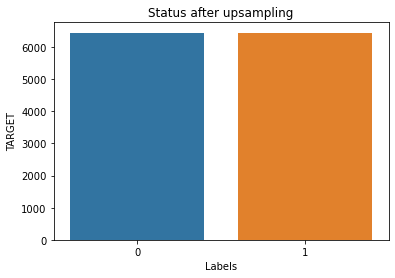

In [60]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','TARGET']
print(oversample_plot)
sns.barplot(x='Labels',y='TARGET',data=oversample_plot);
plt.title('Status after upsampling');

#### **Reduce Overfitting using Principal Componen Analysis (PCA)**

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


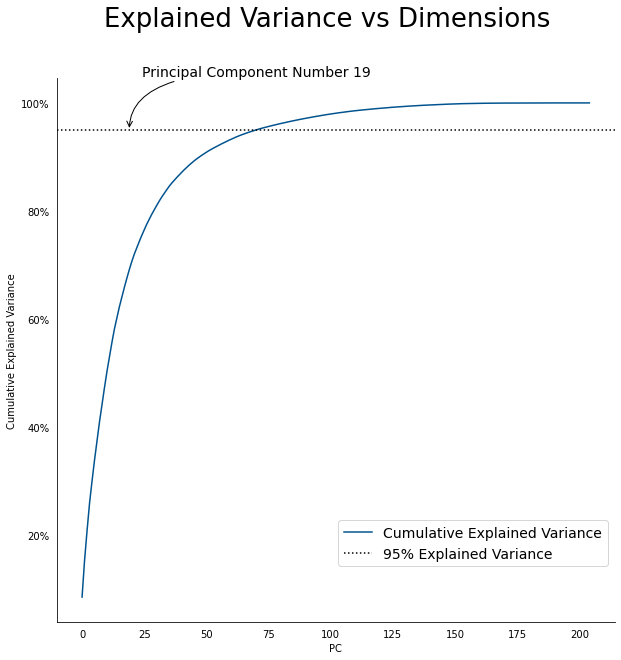

In [61]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

### **Modeling**

#### **Models**
1. Random Forest Classifier
2. Support Vector Classifier (SVC)
3. Logistic Regression
4. Decision Tree Classifier
5. KNeighbors Classifier
6. Gradient Boosting Classifier
7. AdaBoost Classifier
8. XGBoost Classifier
9. CatBoost Classifier
10. ExtraTrees Classifier

#### **1. Random Forest Classifier**

In [62]:
clf1 = RandomForestClassifier(random_state=42)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [63]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_rfc.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [64]:
# Test data performance

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test), y_test))

Test Accuracy Score: 0.9442184776292853
Test Precision: 0.0
Test Recall: 0.0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_train, gs_rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 1.0
Test accuracy of Random Forest Classifier is : 0.9442184776292853
[[1625    0]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### **2. Support Vector Classifier**

In [66]:
clf2 = SVC(probability=True, random_state=42)
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

In [67]:
pipeline = Pipeline([('classifier', clf2)])
params = [param2]
gs_svc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_svc.best_params_

{'classifier': SVC(C=10, probability=True, random_state=42),
 'classifier__C': 10,
 'classifier__class_weight': None}

In [68]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_svc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_svc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_svc.predict(X_test), y_test))

Test Accuracy Score: 0.9442184776292853
Test Precision: 0.0
Test Recall: 0.0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_svc.predict(X_test)
svc_train_acc = accuracy_score(y_train, gs_svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVC is : {svc_train_acc}")
print(f"Test accuracy of SVC is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVC is : 0.9851960936288947
Test accuracy of SVC is : 0.9442184776292853
[[1625    0]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### **3. Logistic Regression**

In [70]:
clf3 = LogisticRegression(random_state=42)
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

In [71]:
pipeline = Pipeline([('classifier', clf3)])
params = [param3]
gs_lr = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_lr.best_params_

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II

{'classifier': LogisticRegression(C=10, random_state=42),
 'classifier__C': 10,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2'}

In [77]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_lr.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_lr.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_lr.predict(X_test), y_test))

Test Accuracy Score: 0.7774549680418361
Test Precision: 0.3125
Test Recall: 0.08645533141210375


In [72]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_lr.predict(X_test)
lr_train_acc = accuracy_score(y_train, gs_lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Logistic Regression is : 0.9223376220740971
Test accuracy of Logistic Regression is : 0.7774549680418361
[[1308  317]
 [  66   30]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1625
           1       0.09      0.31      0.14        96

    accuracy                           0.78      1721
   macro avg       0.52      0.56      0.50      1721
weighted avg       0.90      0.78      0.83      1721



#### **4. Decision Tree Classifier**

In [73]:
clf4 = DecisionTreeClassifier(random_state=42)
param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

In [74]:
pipeline = Pipeline([('classifier', clf4)])
params = [param4]
gs_dtc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_dtc.best_params_

{'classifier': DecisionTreeClassifier(min_samples_split=5, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': None,
 'classifier__min_samples_split': 5}

In [78]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_dtc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_dtc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_dtc.predict(X_test), y_test))

Test Accuracy Score: 0.7635095874491574
Test Precision: 0.2708333333333333
Test Recall: 0.07162534435261708


In [75]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_dtc.predict(X_test)
dtc_train_acc = accuracy_score(y_train, gs_dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree Classifier is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree Classifier is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree Classifier is : 0.9952720508448303
Test accuracy of Decision Tree Classifier is : 0.7635095874491574
[[1288  337]
 [  70   26]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1625
           1       0.07      0.27      0.11        96

    accuracy                           0.76      1721
   macro avg       0.51      0.53      0.49      1721
weighted avg       0.90      0.76      0.82      1721



#### **5. KNeighbors Classifier**

In [81]:
clf5 = KNeighborsClassifier()
param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

In [82]:
pipeline = Pipeline([('classifier', clf5)])
params = [param5]
gs_knc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_knc.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=2),
 'classifier__n_neighbors': 2}

In [83]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_knc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_knc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_knc.predict(X_test), y_test))

Test Accuracy Score: 0.9442184776292853
Test Precision: 0.0
Test Recall: 0.0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_knc.predict(X_test)
knc_train_acc = accuracy_score(y_train, gs_knc.predict(X_train))
knc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNeighbors Classifier is : {knc_train_acc}")
print(f"Test accuracy of KNeighbors Classifier is : {knc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNeighbors Classifier is : 0.9994574484576034
Test accuracy of KNeighbors Classifier is : 0.9442184776292853
[[1625    0]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### **6. Gradient Boosting Classifier**

In [91]:
clf6 = GradientBoostingClassifier(random_state=42)
param6 = {}
param6['classifier__n_estimators'] = [10, 50, 100, 250]
param6['classifier__max_depth'] = [5, 10, 20]
param6['classifier'] = [clf6]

In [92]:
pipeline = Pipeline([('classifier', clf6)])
params = [param6]
gs_gbc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_gbc.best_params_

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42),
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [97]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_gbc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_gbc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_gbc.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs_gbc.predict(X_test), y_test))

Test Accuracy Score: 0.9203951191167926
Test Precision: 0.0625
Test Recall: 0.11320754716981132
Test ROC AUC Score: 0.5296253563187187


In [98]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_gbc.predict(X_test)
gbc_train_acc = accuracy_score(y_train, gs_gbc.predict(X_train))
gbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Gradient Boosting Classifier is : {gbc_train_acc}")
print(f"Test accuracy of Gradient Boosting Classifier is : {gbc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Gradient Boosting Classifier is : 1.0
Test accuracy of Gradient Boosting Classifier is : 0.9203951191167926
[[1578   47]
 [  90    6]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1625
           1       0.11      0.06      0.08        96

    accuracy                           0.92      1721
   macro avg       0.53      0.52      0.52      1721
weighted avg       0.90      0.92      0.91      1721



#### **7. AdaBoost Classifier**

In [99]:
param7 = dict()
param7['n_estimators'] = [10, 50, 100, 500]
param7['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
param7['algorithm'] = ['SAMME', 'SAMME.R']

In [100]:
gs_abc = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param7, n_jobs=-1, cv=10, scoring='accuracy').fit(X_train, y_train)
gs_abc.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}

In [101]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_abc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_abc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_abc.predict(X_test), y_test))

Test Accuracy Score: 0.9442184776292853
Test Precision: 0.0
Test Recall: 0.0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_abc.predict(X_test)
abc_train_acc = accuracy_score(y_train, gs_abc.predict(X_train))
abc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of AdaBoost Classifier is : {abc_train_acc}")
print(f"Test accuracy of AdaBoost Classifier is : {abc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of AdaBoost Classifier is : 0.9660517749186173
Test accuracy of AdaBoost Classifier is : 0.9442184776292853
[[1625    0]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### **8. XGBoost Classifier**

In [103]:
clf8 = XGBClassifier(random_state=42)
param8 = {}
param8['n_estimators'] = [10, 50, 100, 130]
param8['criterion'] = ['gini', 'entropy']
param8['max_depth'] = range(2, 10, 1)

In [104]:
params = [param8]
gs_xgbc = GridSearchCV(clf8, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_xgbc.best_params_

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:40:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 130}

In [105]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_xgbc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_xgbc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_xgbc.predict(X_test), y_test))

Test Accuracy Score: 0.9436374201045904
Test Precision: 0.0
Test Recall: 0.0


In [106]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_xgbc.predict(X_test)
xgbc_train_acc = accuracy_score(y_train, gs_xgbc.predict(X_train))
xgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBoost Classifier is : {xgbc_train_acc}")
print(f"Test accuracy of XGBoost Classifier is : {xgbc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XGBoost Classifier is : 1.0
Test accuracy of XGBoost Classifier is : 0.9436374201045904
[[1624    1]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



#### **9. CatBoost Classifier**

In [107]:
clf9 = CatBoostClassifier(random_state=42)
param9 = {}
param9['depth'] = [4,5,6,7,8,9, 10]
param9['learning_rate'] = [0.01,0.02,0.03,0.04]
param9['iterations'] = [10, 20,30,40,50,60,70,80,90, 100]

In [108]:
params = [param9]
gs_cbc = GridSearchCV(clf9, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_cbc.best_params_

d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baselin

0:	learn: 0.6561327	total: 643ms	remaining: 1m 3s
1:	learn: 0.6150887	total: 1.05s	remaining: 51.3s
2:	learn: 0.5770782	total: 1.45s	remaining: 47s
3:	learn: 0.5500414	total: 1.85s	remaining: 44.5s
4:	learn: 0.5277492	total: 2.27s	remaining: 43.1s
5:	learn: 0.5088938	total: 2.72s	remaining: 42.6s
6:	learn: 0.4906247	total: 3.14s	remaining: 41.7s
7:	learn: 0.4701122	total: 3.54s	remaining: 40.7s
8:	learn: 0.4489344	total: 4.01s	remaining: 40.6s
9:	learn: 0.4333825	total: 4.43s	remaining: 39.8s
10:	learn: 0.4141072	total: 4.93s	remaining: 39.9s
11:	learn: 0.4021690	total: 5.37s	remaining: 39.4s
12:	learn: 0.3923406	total: 5.8s	remaining: 38.8s
13:	learn: 0.3821943	total: 6.2s	remaining: 38.1s
14:	learn: 0.3725636	total: 6.57s	remaining: 37.2s
15:	learn: 0.3619230	total: 6.98s	remaining: 36.6s
16:	learn: 0.3506154	total: 7.36s	remaining: 35.9s
17:	learn: 0.3369380	total: 7.75s	remaining: 35.3s
18:	learn: 0.3272588	total: 8.15s	remaining: 34.7s
19:	learn: 0.3201065	total: 8.53s	remaining: 

{'depth': 10, 'iterations': 100, 'learning_rate': 0.04}

In [109]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_cbc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_cbc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_cbc.predict(X_test), y_test))


Test Accuracy Score: 0.9418942475305055
Test Precision: 0.0
Test Recall: 0.0


In [110]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_cbc.predict(X_test)
cbc_train_acc = accuracy_score(y_train, gs_cbc.predict(X_train))
cbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of CatBoost Classifier is : {cbc_train_acc}")
print(f"Test accuracy of CatBoost Classifier is : {cbc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of CatBoost Classifier is : 0.9694620988993955
Test accuracy of CatBoost Classifier is : 0.9418942475305055
[[1621    4]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



#### **10. ExtraTrees Classifier**

In [111]:
clf10 = ExtraTreesClassifier()
param10 = {}
param10['random_state'] = [0, 1, 2, 3, 4]
param10['n_estimators'] = [320, 340, 360, 380, 400]
param10['max_depth'] = [25, 30, 32, 34, 38, 45]

In [112]:
params = [param10]
gs_etc = GridSearchCV(clf10, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_etc.best_params_

{'max_depth': 45, 'n_estimators': 360, 'random_state': 1}

In [113]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_etc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_etc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_etc.predict(X_test), y_test))

Test Accuracy Score: 0.9442184776292853
Test Precision: 0.0
Test Recall: 0.0


d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_etc.predict(X_test)
etc_train_acc = accuracy_score(y_train, gs_etc.predict(X_train))
etc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of ExtraTrees Classifier is : {etc_train_acc}")
print(f"Test accuracy of ExtraTrees Classifier is : {etc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of ExtraTrees Classifier is : 1.0
Test accuracy of ExtraTrees Classifier is : 0.9442184776292853
[[1625    0]
 [  96    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1625
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AKTUARIA-BINAWAN\SEMESTER VII\Ekonometrika II\Anacondas\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

### **Models Performance Comparison**

In [4]:
models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Support Vector Classifier (SVC)', 'Logistic Regression',
               'Decision Tree Classifier', 'KNeighbors Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'XGBoost Classifier',
               'CatBoost Classifier', 'ExtraTrees Classifier'],
    'Score' : [rfc_test_acc, svc_test_acc, lr_test_acc, dtc_clf_test_acc, knc_test_acc, 
               gbc_test_acc, abc_test_acc, xgbc_test_acc, cbc_test_acc, 
               etc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest Classifier,0.944218
1,Support Vector Classifier (SVC),0.944218
4,KNeighbors Classifier,0.944218
6,AdaBoost Classifier,0.944218
9,ExtraTrees Classifier,0.944218
7,XGBoost Classifier,0.943637
8,CatBoost Classifier,0.941894
5,Gradient Boosting Classifier,0.920395
2,Logistic Regression,0.777455
3,Decision Tree Classifier,0.763510


In [5]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

### **Conclusion**

Best Model : Random Forest Classifier
Accuracy : 0.9442184776292853 (94,42 %)